<a href="https://colab.research.google.com/github/leewclee600/leewclee600.github.io/blob/master/EC601_project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and setting up enviroments

In [ ]:
#import kaggle data into colab

!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leewclee600","key":"3bd26eff6a2e24ecbc27896495a1365f"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
jmmvutu/summer-products-and-sales-in-ecommerce-wish               Sales of summer clothes in E-commerce Wish        376KB  2020-08-23 15:16:46           1658  
Cornell-University/arxiv                                          arXiv Dataset                                     877MB  2020-08-14 23:50:57           1901  
agirlcoding/all-space-missions-from-1957                          All Space Missions from 1957                      101KB  2020-08-13 16:18:58           1151  
landlord/handwriting-recognition                                  Handwriting Recognition                             1GB  2020-08-05 17:20:36            378  
andrewmvd/heart-failure-clinical-data   

In [ ]:
!kaggle competitions download -c osic-pulmonary-fibrosis-progression

  0% 0.00/669k [00:00<?, ?B/s]
100% 669k/669k [00:00<00:00, 45.1MB/s]
  0% 0.00/672k [00:00<?, ?B/s]
100% 672k/672k [00:00<00:00, 98.0MB/s]
  0% 0.00/672k [00:00<?, ?B/s]
100% 672k/672k [00:00<00:00, 94.2MB/s]
  0% 0.00/669k [00:00<?, ?B/s]
100% 669k/669k [00:00<00:00, 94.1MB/s]
  0% 0.00/671k [00:00<?, ?B/s]
100% 671k/671k [00:00<00:00, 92.1MB/s]
  0% 0.00/689k [00:00<?, ?B/s]
100% 689k/689k [00:00<00:00, 97.9MB/s]
  0% 0.00/671k [00:00<?, ?B/s]
100% 671k/671k [00:00<00:00, 93.7MB/s]
  0% 0.00/669k [00:00<?, ?B/s]
100% 669k/669k [00:00<00:00, 89.9MB/s]
  0% 0.00/671k [00:00<?, ?B/s]
100% 671k/671k [00:00<00:00, 92.6MB/s]
  0% 0.00/670k [00:00<?, ?B/s]
100% 670k/670k [00:00<00:00, 93.8MB/s]
  0% 0.00/671k [00:00<?, ?B/s]
100% 671k/671k [00:00<00:00, 85.8MB/s]
  0% 0.00/670k [00:00<?, ?B/s]
100% 670k/670k [00:00<00:00, 94.7MB/s]
  0% 0.00/670k [00:00<?, ?B/s]
100% 670k/670k [00:00<00:00, 92.4MB/s]
  0% 0.00/670k [00:00<?, ?B/s]
100% 670k/670k [00:00<00:00, 94.1MB/s]
  0% 0.00/689k [00:0

In [ ]:
import os
import datetime
from functools import lru_cache
import cv2

import io

!pip install pydicom

import pydicom
import pandas as pd
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import random
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow_addons.optimizers import RectifiedAdam
from tensorflow.keras import Model
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
from tensorflow.keras.optimizers import Nadam
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

!pip install colorama

from colorama import Fore, Back, Style

from google.colab import files

def seed_everything(seed=2020):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(42)
ROOT = "/content/"

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [ ]:
train = pd.read_csv(os.path.join(ROOT, 'train.csv'))

In [ ]:
test = pd.read_csv(os.path.join(ROOT, 'test.csv'))

In [ ]:
test1.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [ ]:
uploaded_train = files.upload()

Saving train.csv to train.csv


In [ ]:
test_upload = files.upload()

Saving test.csv to test.csv


In [ ]:
train = pd.read_csv(io.BytesIO(uploaded_train['train.csv']))
test = pd.read_csv(io.BytesIO(test_upload['test.csv']))

Generate Linear Decay function

In [ ]:
def get_agss_vector(df):
    
    """agss = age, gender, smokingstatus"""
    
    normalized_age = [(df.Age.values[0] - 30) / 30] 

    gender = [0 if df.Sex.values[0] == 'male' else 1]
    
    if df.SmokingStatus.values[0] == 'Never smoked':
        smoking_status = [0, 0]
    elif df.SmokingStatus.values[0] == 'Ex-smoker':
        smoking_status = [1, 1]
    elif df.SmokingStatus.values[0] == 'Currently smokes':
        smoking_status = [0, 1]
    else:
        smoking_status = [1, 0]

    vector = normalized_age + gender + smoking_status
    return np.array(vector)

In [ ]:
def sample_best_fit_line_weeks_vs_fvc():
    
    patient = train.Patient.sample().iloc[0]
    sub = train.loc[train.Patient == patient, :]
    fvc = sub.FVC.values
    weeks = sub.Weeks.values
    vals = np.c_[weeks, np.ones(len(weeks))]  # column-wise stack
    
    # see example https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
    m, c = np.linalg.lstsq(vals, fvc, rcond=-1)[0]
    
    print(f"Patient number: {patient}")
    print("FVC", fvc)
    print("Weeks", weeks)
    print(vals)
    print(f"gradient: {m:.2f}\nintercept: {c:.2f}")
    print()
    _ = plt.plot(weeks, fvc, 'o', label='Original data', markersize=10)
    _ = plt.plot(weeks, m * weeks + c, 'r', label='Fitted line')
    _ = plt.legend()
    _ = plt.xlabel("Weeks"), plt.ylabel("FVC")
    plt.show()

Patient number: ID00099637202206203080121
FVC [2934 2866 3065 3089 3005 3001 2769 2708 2862 2833]
Weeks [ 44  47  49  51  53  58  70  83  98 102]
[[ 44.   1.]
 [ 47.   1.]
 [ 49.   1.]
 [ 51.   1.]
 [ 53.   1.]
 [ 58.   1.]
 [ 70.   1.]
 [ 83.   1.]
 [ 98.   1.]
 [102.   1.]]
gradient: -3.62
intercept: 3150.44



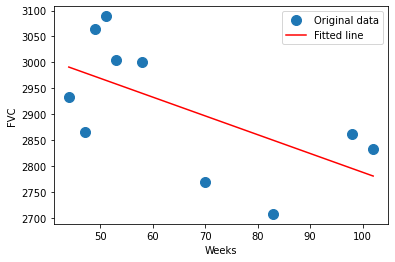

In [ ]:
# gradient = rate of decay in FVC values
sample_best_fit_line_weeks_vs_fvc()

In [ ]:
gradients = {} 
agss_vectors = {} 
patients = []

for i, patient_id in enumerate(train.Patient.unique()):
    sub = train.loc[train.Patient == patient_id, :] 
    fvc = sub.FVC.values
    weeks = sub.Weeks.values
    c = np.c_[weeks, np.ones(len(weeks))]
    gradient, intercept = np.linalg.lstsq(c, fvc, rcond=-1)[0]
    
    gradients[patient_id] = gradient
    agss_vectors[patient_id] = get_agss_vector(sub)
    patients.append(patient_id)

#CNN for coeff prediction

In [ ]:
def get_img(path):
    d = pydicom.dcmread(path)
    return cv2.resize(d.pixel_array / 2**11, (512, 512))

In [ ]:
upload_image = files.upload()

In [ ]:
upload_image = files.upload()

Saving 1.dcm to 1.dcm


In [ ]:
#im = Image.open(BytesIO(uploaded['Image_file_name.jpg']))

In [ ]:
_ = plt.imshow(get_img(upload_image) )


AttributeError: ignored